<a href="https://colab.research.google.com/github/Kritiman2005/ML-Projects-/blob/main/Customer_Satisfaction_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the Dataset

In [ ]:
dataset = pd.read_csv('customer_support_tickets.csv')

#Data Preprocessing

In [ ]:
dataset.head(10)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
5,6,Rebecca Fleming,sheenasmith@example.com,53,Male,Microsoft Office,2020-07-28,Cancellation request,Payment issue,I'm facing a problem with my {product_purchase...,Open,NaN,Low,Social media,NaN,NaN,NaN
6,7,Jacqueline Wright,donaldkeith@example.org,24,Other,Microsoft Surface,2020-02-23,Product inquiry,Refund request,I'm unable to access my {product_purchased} ac...,Open,NaN,Critical,Social media,NaN,NaN,NaN
7,8,Denise Lee,joelwilliams@example.com,23,Male,Philips Hue Lights,2020-08-09,Refund request,Battery life,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Social media,NaN,NaN,NaN
8,9,Nicolas Wilson,joshua24@example.com,60,Other,Fitbit Versa Smartwatch,2020-07-16,Technical issue,Installation support,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Low,Social media,2023-06-01 10:32:47,NaN,NaN
9,10,William Dawson,clopez@example.com,27,Male,Dyson Vacuum Cleaner,2020-03-06,Refund request,Payment issue,My {product_purchased} is making strange noise...,Pending Customer Response,NaN,Critical,Phone,2023-06-01 09:25:48,NaN,NaN


#Data Cleaning

In [ ]:
print(dataset.isnull().sum())


Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64


In [ ]:
dataset['Resolution'] = dataset['Resolution'].fillna('Unknown')
dataset['First Response Time'] = dataset['First Response Time'].fillna('Unknown')
dataset['Time to Resolution'] = dataset['Time to Resolution'].fillna('Unknown')
dataset['Customer Satisfaction Rating'] = dataset['Customer Satisfaction Rating'].fillna(0)



In [ ]:
dataset.head(20)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Unknown,Critical,Social media,2023-06-01 12:15:36,Unknown,0.0
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Unknown,Critical,Chat,2023-06-01 16:45:38,Unknown,0.0
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
5,6,Rebecca Fleming,sheenasmith@example.com,53,Male,Microsoft Office,2020-07-28,Cancellation request,Payment issue,I'm facing a problem with my {product_purchase...,Open,Unknown,Low,Social media,Unknown,Unknown,0.0
6,7,Jacqueline Wright,donaldkeith@example.org,24,Other,Microsoft Surface,2020-02-23,Product inquiry,Refund request,I'm unable to access my {product_purchased} ac...,Open,Unknown,Critical,Social media,Unknown,Unknown,0.0
7,8,Denise Lee,joelwilliams@example.com,23,Male,Philips Hue Lights,2020-08-09,Refund request,Battery life,I'm having an issue with the {product_purchase...,Open,Unknown,Critical,Social media,Unknown,Unknown,0.0
8,9,Nicolas Wilson,joshua24@example.com,60,Other,Fitbit Versa Smartwatch,2020-07-16,Technical issue,Installation support,I'm having an issue with the {product_purchase...,Pending Customer Response,Unknown,Low,Social media,2023-06-01 10:32:47,Unknown,0.0
9,10,William Dawson,clopez@example.com,27,Male,Dyson Vacuum Cleaner,2020-03-06,Refund request,Payment issue,My {product_purchased} is making strange noise...,Pending Customer Response,Unknown,Critical,Phone,2023-06-01 09:25:48,Unknown,0.0


# Applying Roberta Pretrained Model

We can clearly see from the dataset we can apply sentiment analysis on Resolution




In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = "textattack/roberta-base-SST-2"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/525 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at textattack/roberta-base-SST-2 were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_pos' : scores[1]

    }
    return scores_dict

In [ ]:
from tqdm.notebook import tqdm

res = {}
for i, row in tqdm(dataset.iterrows(), total=len(dataset)):
    text = row['Resolution']
    myid = row['Ticket ID']
    res[myid] = polarity_scores_roberta(str(text))

  0%|          | 0/8469 [00:00<?, ?it/s]

In [ ]:
res

{1: {'roberta_neg': np.float32(0.95475185),
  'roberta_pos': np.float32(0.045248147)},
 2: {'roberta_neg': np.float32(0.95475185),
  'roberta_pos': np.float32(0.045248147)},
 3: {'roberta_neg': np.float32(0.5556218),
  'roberta_pos': np.float32(0.44437823)},
 4: {'roberta_neg': np.float32(0.9745635),
  'roberta_pos': np.float32(0.025436454)},
 5: {'roberta_neg': np.float32(0.28334996),
  'roberta_pos': np.float32(0.71665)},
 6: {'roberta_neg': np.float32(0.95475185),
  'roberta_pos': np.float32(0.045248147)},
 7: {'roberta_neg': np.float32(0.95475185),
  'roberta_pos': np.float32(0.045248147)},
 8: {'roberta_neg': np.float32(0.95475185),
  'roberta_pos': np.float32(0.045248147)},
 9: {'roberta_neg': np.float32(0.95475185),
  'roberta_pos': np.float32(0.045248147)},
 10: {'roberta_neg': np.float32(0.95475185),
  'roberta_pos': np.float32(0.045248147)},
 11: {'roberta_neg': np.float32(0.054356843),
  'roberta_pos': np.float32(0.9456431)},
 12: {'roberta_neg': np.float32(0.45518017),
  'r

In [ ]:
roberta = pd.DataFrame(res).T

In [ ]:
roberta

,roberta_neg,roberta_pos
1,0.954752,0.045248
2,0.954752,0.045248
3,0.555622,0.444378
4,0.974563,0.025436
5,0.283350,0.716650
...,...,...
8465,0.954752,0.045248
8466,0.954752,0.045248
8467,0.143605,0.856395
8468,0.204605,0.795395


In [ ]:
roberta = roberta.reset_index().rename(columns={'index': 'Ticket ID'})
roberta = roberta.merge(dataset, how='left')

In [ ]:
roberta

,Ticket ID,roberta_neg,roberta_pos,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,0.954752,0.045248,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Unknown,Critical,Social media,2023-06-01 12:15:36,Unknown,0.0
1,2,0.954752,0.045248,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Unknown,Critical,Chat,2023-06-01 16:45:38,Unknown,0.0
2,3,0.555622,0.444378,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,0.974563,0.025436,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,0.283350,0.716650,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,0.954752,0.045248,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,Unknown,Low,Phone,Unknown,Unknown,0.0
8465,8466,0.954752,0.045248,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,Unknown,Critical,Email,Unknown,Unknown,0.0
8466,8467,0.143605,0.856395,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,0.204605,0.795395,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


# EDA

Analysing the effect of Roberta Model for Customer Satisfaction Rating

---> Effect of Positive Sentiment

<ipython-input-16-4295c5796e98>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=roberta,


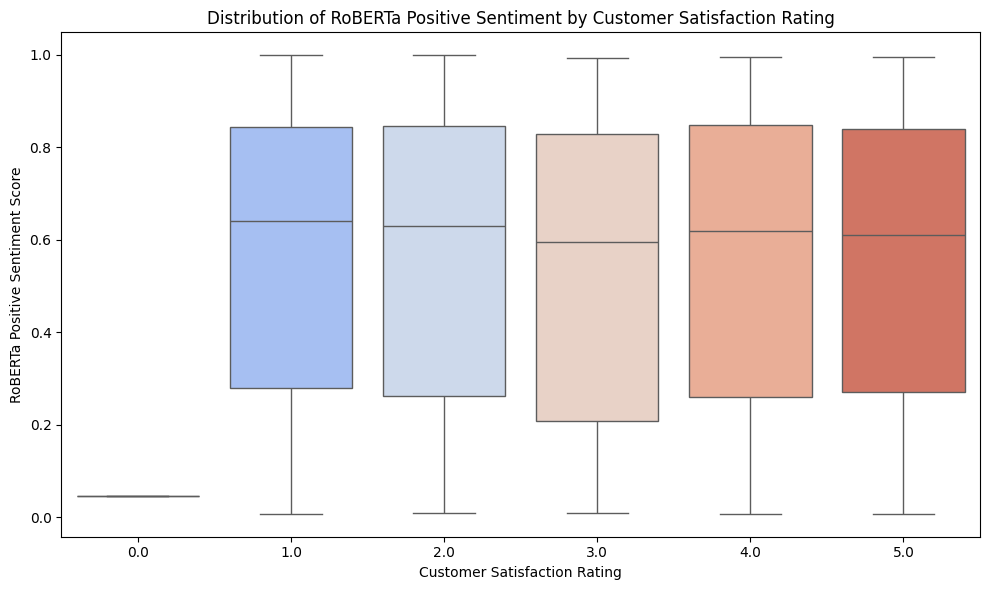

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=roberta,
            x='Customer Satisfaction Rating',
            y='roberta_pos',
            palette='coolwarm')

plt.title('Distribution of RoBERTa Positive Sentiment by Customer Satisfaction Rating')
plt.xlabel('Customer Satisfaction Rating')
plt.ylabel('RoBERTa Positive Sentiment Score')
plt.tight_layout()
plt.show()

-----> Effect of Negative Sentiment

<ipython-input-17-0a1bb09b1f73>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=roberta,


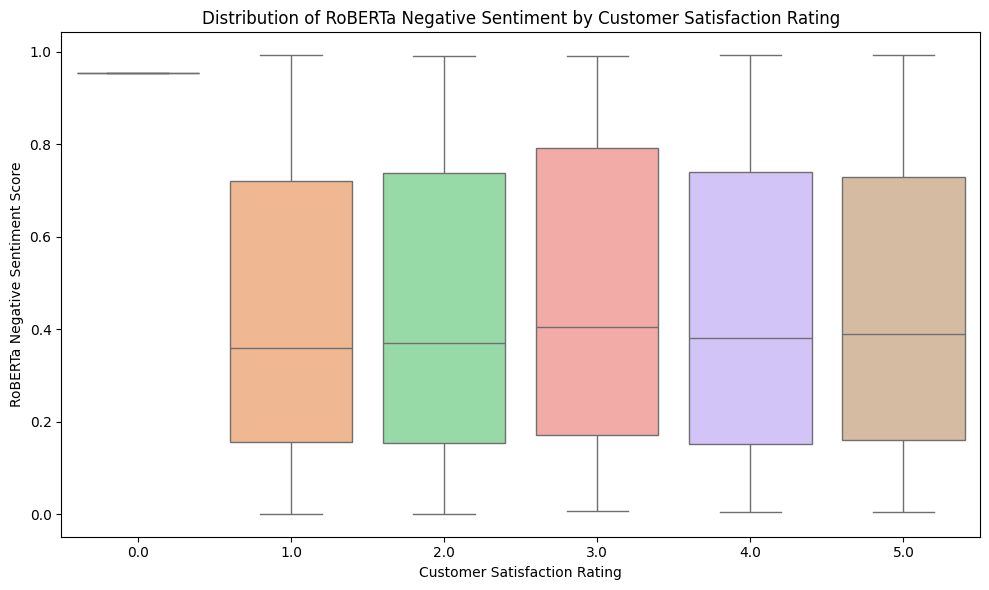

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=roberta,
            x='Customer Satisfaction Rating',
            y='roberta_neg',
            palette='pastel')

plt.title('Distribution of RoBERTa Negative Sentiment by Customer Satisfaction Rating')
plt.xlabel('Customer Satisfaction Rating')
plt.ylabel('RoBERTa Negative Sentiment Score')
plt.tight_layout()
plt.show()

Visualising the responsive nature of the team

In [ ]:
import pandas as pd

resolution_counts = roberta['Resolution'].apply(lambda x: 'Resolution Taken' if pd.notnull(x) and x != 'Unknown' else 'Resolution Not Taken').value_counts()

print(resolution_counts)


Resolution
Resolution Not Taken    5700
Resolution Taken        2769
Name: count, dtype: int64


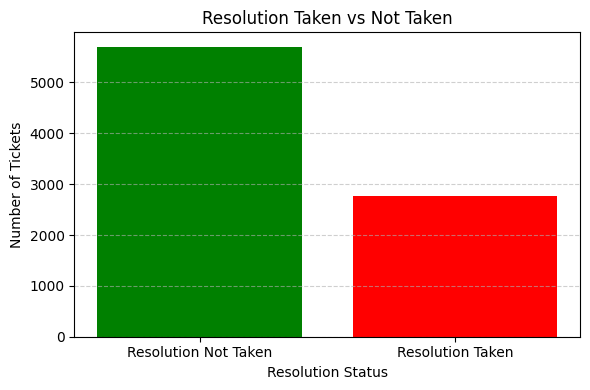

In [ ]:

plt.figure(figsize=(6, 4))
plt.bar(resolution_counts.index, resolution_counts.values, color=['green', 'red'])
plt.title('Resolution Taken vs Not Taken')
plt.xlabel('Resolution Status')
plt.ylabel('Number of Tickets')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Seeing the effects of Resolution Taken and Not Taken on The Customer Satisfaction Rating

In [ ]:
roberta['Resolution status'] = roberta['Resolution'].apply(lambda x: 'Resolution Taken' if pd.notnull(x) and x != 'Unknown' else 'Resolution Not Taken')

In [ ]:
roberta

,Ticket ID,roberta_neg,roberta_pos,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution status
0,1,0.954752,0.045248,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Unknown,Critical,Social media,2023-06-01 12:15:36,Unknown,0.0,Resolution Not Taken
1,2,0.954752,0.045248,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Unknown,Critical,Chat,2023-06-01 16:45:38,Unknown,0.0,Resolution Not Taken
2,3,0.555622,0.444378,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,Resolution Taken
3,4,0.974563,0.025436,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,Resolution Taken
4,5,0.283350,0.716650,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,Resolution Taken
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,0.954752,0.045248,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,Unknown,Low,Phone,Unknown,Unknown,0.0,Resolution Not Taken
8465,8466,0.954752,0.045248,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,Unknown,Critical,Email,Unknown,Unknown,0.0,Resolution Not Taken
8466,8467,0.143605,0.856395,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0,Resolution Taken
8467,8468,0.204605,0.795395,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0,Resolution Taken


<ipython-input-25-d9c6e9f08389>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=roberta, x='Resolution status', y='Customer Satisfaction Rating', palette={'Resolution Taken': 'green', 'Resolution Not Taken': 'red'})


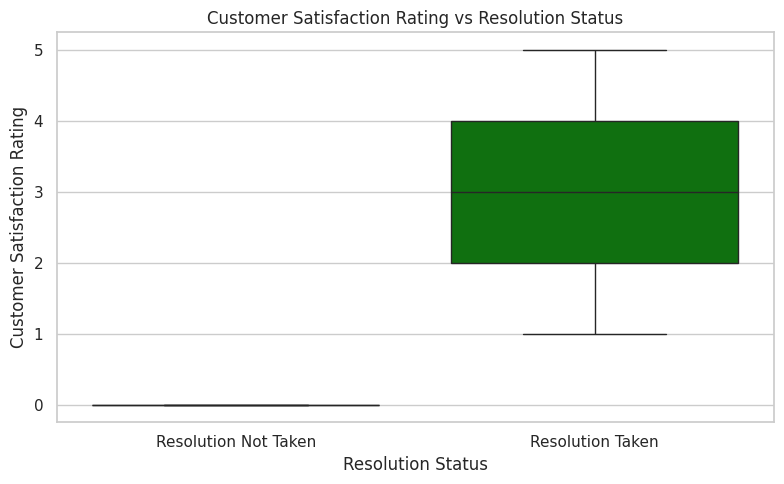

In [ ]:
sns.set(style="whitegrid")


plt.figure(figsize=(8, 5))
sns.boxplot(data=roberta, x='Resolution status', y='Customer Satisfaction Rating', palette={'Resolution Taken': 'green', 'Resolution Not Taken': 'red'})
plt.title('Customer Satisfaction Rating vs Resolution Status')
plt.xlabel('Resolution Status')
plt.ylabel('Customer Satisfaction Rating')
plt.tight_layout()
plt.show()

--->Clearly it can be seen that without taking any kind of resolution Customer rating has vanished. The average rating got was 3.

In [ ]:
grouped = roberta.groupby(['Ticket Priority', 'Resolution status']).size().reset_index(name='Count')


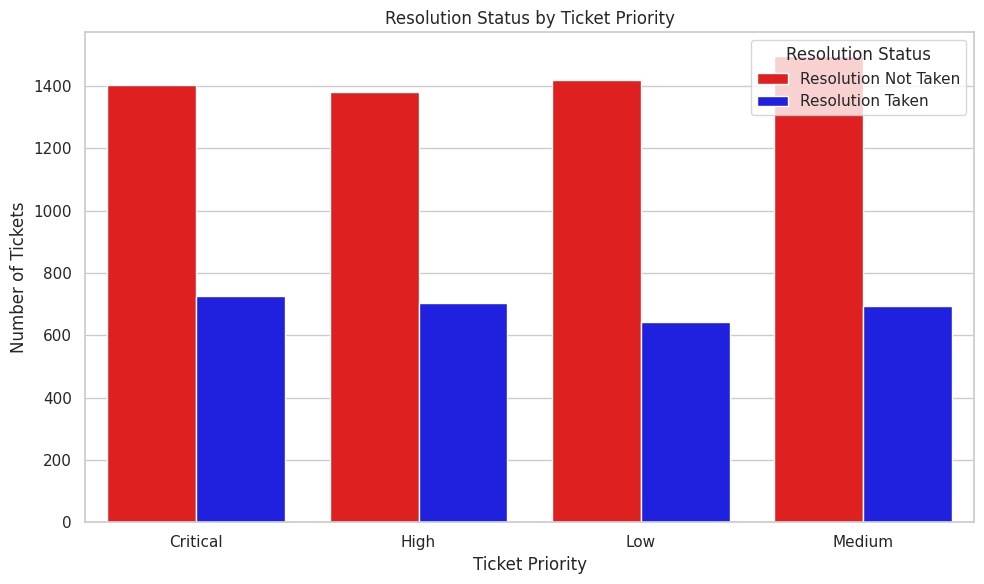

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='Ticket Priority', y='Count', hue='Resolution status', palette={'Resolution Taken': 'blue', 'Resolution Not Taken': 'red'})

plt.title('Resolution Status by Ticket Priority')
plt.xlabel('Ticket Priority')
plt.ylabel('Number of Tickets')
plt.legend(title='Resolution Status')

plt.tight_layout()
plt.show()

--->Clearly it can be seen Ticket priority was just by the name no service was provided to resolve thus compromising Customer Satisfaction rating